# Imports 'n Such 

In [72]:
def fdr(model, x_df, y_df): 
    probs = pd.Series(model.predict_proba(x_df)[:,1]).sort_values(ascending=False)

    numbads = y_df.sum()
    topRows = int(round(len(probs)*0.03))
    detected = y_df[probs.head(topRows).index].sum()
    total = y_df.sum()

    return((detected / total)*100) 

In [73]:
def fdr_nn(model, x_df, y_df): 
    probs = model.predict(x_df)
    probs = pd.DataFrame(probs, columns=['yup'])['yup'].sort_values(ascending=False)

    numbads = y_df.sum()
    topRows = int(round(len(probs)*0.03))
    detected = y_df[probs.head(topRows).index].sum()
    total = y_df.sum()

    return((detected / total)*100) 

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import operator 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

import math

In [75]:
mydata = pd.read_csv('CreditCardFraudData.csv', parse_dates = ['Date'])

In [76]:
orig_df = pd.read_csv("cleaned_data.csv")

In [77]:
print(mydata.shape)
print(orig_df.shape)

(96205, 19)
(96397, 11)


In [78]:
mydata = mydata.merge(orig_df[["Recnum", "Merchnum"]], on="Recnum")\
    .drop("Merchnum_x", axis=1)\
    .rename(columns={"Merchnum_y":"Merchnum"})

In [79]:
mydata.head()

,Recnum,Date,Fraud,Cardnum,Amount_Cardnum_Merch_description_sum_7,Amount_Merchnum_actual/median_365,Amount_Cardnum_sum_1,Amount_Cardnum_Merch_description_max_7,Amount_Cardnum_Merchnum_sum_30,Amount_Merchnum_max_1,Amount_Merchnum_max_3,Amount_Merchnum_max_14,Amount_Cardnum_Merch zip_median_180,Amount_Cardnum_Merch zip_max_30,Amount_Cardnum_sum_3,Amount_Cardnum_Industry_sum_0,Amount_Cardnum_median_30,Amount_Cardnum_Merch_description_sum_14,Merchnum
0,1,2010-01-01,0,5142190439,3.62,1.0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,5509006296254
1,2,2010-01-01,0,5142183973,31.42,1.0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,61003026333
2,3,2010-01-01,0,5142131721,178.49,1.0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,4503082993600
3,4,2010-01-01,0,5142148452,3.62,1.0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,5509006296254
4,5,2010-01-01,0,5142190439,7.24,1.0,7.24,3.62,7.24,3.62,3.62,3.62,3.62,3.62,7.24,7.24,3.62,7.24,5509006296254


# Splitting Data

In [80]:
train_test = mydata[mydata['Date'] <  '2010-11-01']
oot_X = mydata[mydata['Date'] >= '2010-11-01']

oot_y = oot_X['Fraud']
train_test_Y = train_test['Fraud']

In [81]:
train_test.drop(columns=['Recnum', 'Date', 'Cardnum','Merchnum', 'Fraud'], inplace = True)
oot_X.drop(columns=['Recnum', 'Date', 'Cardnum','Merchnum', 'Fraud'], inplace = True)

# Modeling

## Final Random Forest

In [82]:
X_final = train_test
y_final = train_test_Y

In [83]:
#RUN THIS ONE

x_val = {'train':[],'oot':[]} 
model_fdr = []

for i in range(10): 
#     X_train, X_test, y_train, y_test =\
#     train_test_split(train_test, train_test_Y,
#     test_size=0.25,
#     stratify=train_test_Y)

#     y_train.reset_index(level = 0, drop = True, inplace = True)
#     y_test.reset_index(level = 0, drop = True, inplace = True)
    oot_y.reset_index(level = 0, drop = True, inplace = True)

    model = RandomForestClassifier(n_estimators = 50, criterion = 'gini',
                                   max_depth=10, 
                                   min_samples_split=300)
    model.fit(X_final, y_final)

    x_val['train'].append(fdr(model, X_final, y_final)) 
    x_val['oot'].append(fdr(model, oot_X, oot_y)) 
    print(i)

model_fdr.append([model, np.mean(x_val['train']), np.mean(x_val['oot'])])

print(model, np.mean(x_val['train']), np.mean(x_val['oot']))

0
1
2
3
4
5
6
7
8
9
RandomForestClassifier(max_depth=10, min_samples_split=300, n_estimators=50) 84.63636363636364 63.184357541899445


In [84]:
pred_y = model.predict_proba(oot_X)[:,[1]]

In [85]:
pred_y

array([[0.00056528],
       [0.00059366],
       [0.00052897],
       ...,
       [0.00663432],
       [0.00711162],
       [0.17033348]])

# Graphs

## Optimal FDR cutoff

In [86]:
oot_graph = pred_y.copy()
oot_graph=pd.DataFrame(oot_graph[:,0], columns=['Prob'])
oot_graph['actual_y'] = oot_y
oot_graph.sort_values(by='Prob',ascending=False, inplace=True)

In [87]:
#total fraud savings
fraud_savings = np.cumsum(oot_graph['actual_y']*2000)
fraud_savings.reset_index(drop=True, inplace=True)

In [88]:
false_pos = oot_graph['actual_y'].apply(lambda x: 50 if x==0 else 0)
false_positive = np.cumsum(false_pos)
false_positive.reset_index(drop=True,inplace=True)

In [97]:
len(overall_savings)

12396

In [89]:
overall_savings = fraud_savings - false_positive
overall_savings.reset_index(drop=True, inplace=True)

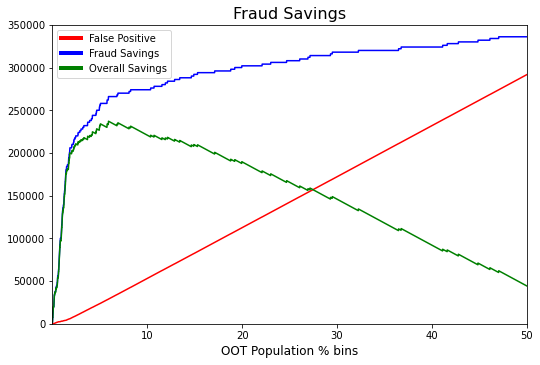

In [24]:
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(8.5,5.5))
plt.plot(false_positive, color='red')
plt.plot(fraud_savings, color='blue')
plt.plot(overall_savings, color ='green')
plt.xticks([1200, 2400, 3600, 4800, 6000], [10, 20, 30, 40, 50])
plt.xlim([0,6000])
plt.ylim([0,350000])
plt.title('Fraud Savings', fontsize=16)
plt.xlabel('OOT Population % bins', fontsize=12)

custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['False Positive', 'Fraud Savings', 'Overall Savings'])

In [91]:
#finding a % of cutoff
overall_savings.idxmax()
overall_savings.idxmax()/len(false_positive)*100

5.921264924169087

In [92]:
#Maximum overall savings
overall_savings.max()

233850

## Frequency of transaction

In [28]:
pred_y = pred_y.reshape(-1)

In [29]:
oot_trans = mydata[mydata['Date'] > '2010-10-31']
oot_trans.loc[:,'Prob'] = pred_y

/Users/anushkakapur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anushkakapur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
oot_trans.tail()

,Recnum,Date,Fraud,Cardnum,Amount_Cardnum_Merch_description_sum_7,Amount_Merchnum_actual/median_365,Amount_Cardnum_sum_1,Amount_Cardnum_Merch_description_max_7,Amount_Cardnum_Merchnum_sum_30,Amount_Merchnum_max_1,Amount_Merchnum_max_3,Amount_Merchnum_max_14,Amount_Cardnum_Merch zip_median_180,Amount_Cardnum_Merch zip_max_30,Amount_Cardnum_sum_3,Amount_Cardnum_Industry_sum_0,Amount_Cardnum_median_30,Amount_Cardnum_Merch_description_sum_14,Merchnum,Prob
96200,96749,2010-12-31,0,5142276053,84.79,1.000000,84.79,84.79,84.79,84.79,84.79,84.79,84.79,84.79,84.79,84.79,84.79,84.79,3500000006160,0.000470
96201,96750,2010-12-31,0,5142225701,118.75,0.543628,803.75,118.75,718.60,118.75,118.75,763.53,106.44,599.85,3140.25,118.75,474.13,718.60,8090710030950,0.001498
96202,96751,2010-12-31,0,5142226486,363.56,0.762180,1501.14,363.56,363.56,2487.98,2487.98,2487.98,363.56,363.56,1689.92,363.56,263.04,363.56,4503057341100,0.005503
96203,96752,2010-12-31,0,5142244619,2202.03,5.503286,2202.03,2202.03,2745.63,2312.55,2312.55,2349.95,475.33,2202.03,2202.03,2202.03,493.84,2202.03,8834000695412,0.007602
96204,96753,2010-12-31,0,5142243247,3864.32,9.346815,554.64,3142.52,721.80,554.64,554.64,554.64,91.36,3142.52,6457.51,554.64,62.46,3864.32,9108347680006,0.233312


In [31]:
trans = oot_trans.copy()
# trans['Date'] = mydata['Date']
# trans['Merchnum'] = mydata['Merchnum']
# trans['Cardnum'] = mydata['Cardnum']

In [32]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import warnings 
warnings.filterwarnings('ignore')

### Merchant

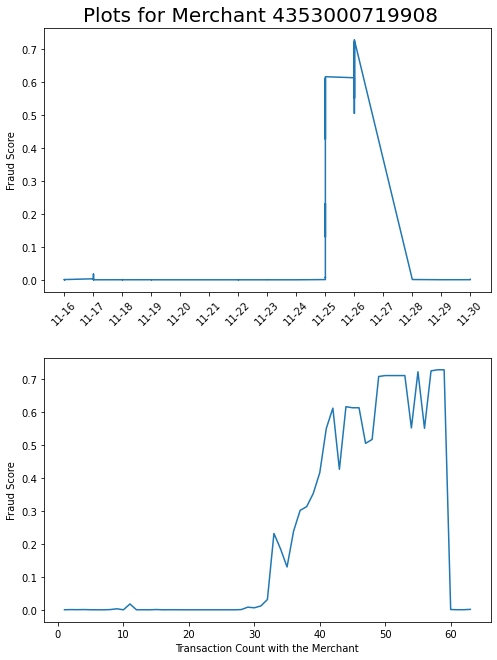

In [109]:
merchnum = "4353000719908"
merch = trans[trans['Merchnum'] == merchnum]
merch = merch[(merch["Date"] >= "2010-11-15") & (merch["Date"] < "2010-12-01")]

merch_2 = merch.iloc[:, [0,1,-2,-1]]

merch_2["cum_prob"] = merch_2["Prob"].expanding().mean()
merch_2["count"] = np.arange(1, merch_2.shape[0]+1)

agg_merch_2 = merch_2.groupby('Date')['Prob'].agg(['count','mean','max']).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].plot(merch_2['Date'], merch_2['Prob'])

date_form = DateFormatter("%m-%d")
ax[0].xaxis.set_major_formatter(date_form)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))

ax[0].set_ylabel("Fraud Score")

ax[1].plot(merch_2['count'], merch_2['Prob'])

ax[1].set_xlabel("Transaction Count with the Merchant")
ax[1].set_ylabel("Fraud Score")

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)

fig.subplots_adjust(top=0.95, hspace=0.25)
fig.suptitle(f"Plots for Merchant {merchnum}", size=20)    
    
# fig.savefig("Merch_2.png")
fig.show()

### Cardnum

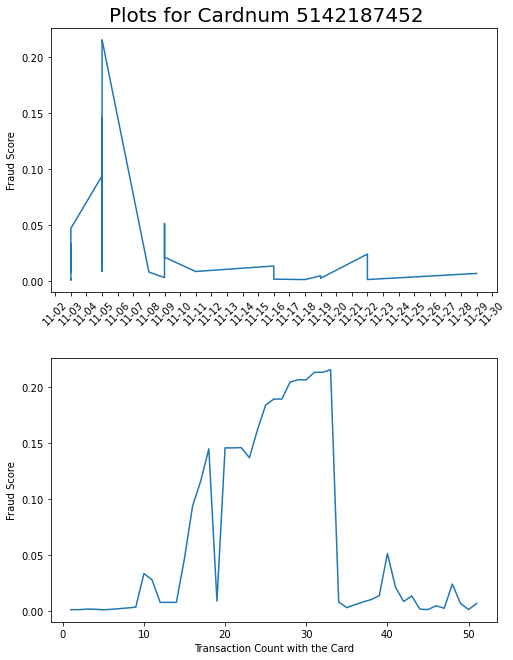

In [110]:
cardnum = 5142187452
card = trans[trans['Cardnum'] == cardnum]
card = card[(card["Date"] >= "2010-11-03") & (card["Date"] < "2010-12-01")]

card_2 = card.iloc[:, [0,1,3,-1]]

card_2["cum_prob"] = card_2["Prob"].expanding().mean()
card_2["count"] = np.arange(1, card_2.shape[0]+1)

agg_card_2 = card_2.groupby('Date')['Prob'].agg(['count','mean']).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].plot(card_2['Date'], card_2['Prob'])

date_form = DateFormatter("%m-%d")
ax[0].xaxis.set_major_formatter(date_form)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))

ax[0].set_ylabel("Fraud Score")

ax[1].plot(card_2['count'], card_2['Prob'])

ax[1].set_xlabel("Transaction Count with the Card")
ax[1].set_ylabel("Fraud Score")

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)

fig.subplots_adjust(top=0.95, hspace=0.25)
fig.suptitle(f"Plots for Cardnum {cardnum}", size=20)    
    
fig.savefig("Card_2.png")
# fig.show()